In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importa i dati

In [37]:
files = list_età_csv()

files

array(['../dati/data_iss_età_2021-07-14.csv',
       '../dati/data_iss_età_2021-07-21.csv',
       '../dati/data_iss_età_2021-07-28.csv',
       '../dati/data_iss_età_2021-08-04.csv',
       '../dati/data_iss_età_2021-08-11.csv',
       '../dati/data_iss_età_2021-08-18.csv',
       '../dati/data_iss_età_2021-08-25.csv',
       '../dati/data_iss_età_2021-09-01.csv',
       '../dati/data_iss_età_2021-09-08.csv',
       '../dati/data_iss_età_2021-09-15.csv',
       '../dati/data_iss_età_2021-09-22.csv',
       '../dati/data_iss_età_2021-09-29.csv',
       '../dati/data_iss_età_2021-10-06.csv'], dtype='<U35')

### genera gli andamenti per categoria e per fasce d'età

In [124]:
def ricava_andamenti_età(files, età, colonna, incidenza_settimanale):
    
    from custom.plots import date_from_csv_path, list_età_csv
    
    # create dates
    dates = []
    for f in files:
        dates.append(date_from_csv_path(f))
        
    # loop around the .csv files
    results_date = []
    for i in range(len(files)):
        df = pd.read_csv(files[i], sep=';')
        df = df[df['età']==età]

        non_vacc_labels = ['casi non vaccinati', 'ospedalizzati non vaccinati', 
                'terapia intensiva non vaccinati', 'decessi non vaccinati']

        vacc_labels = ['casi vaccinati', 'ospedalizzati vaccinati', 
                       'terapia intensiva vaccinati', 'decessi vaccinati']

        if incidenza_settimanale == True:
            # calcola incidenza settimanale ogni 100.000 abitanti per ciascun gruppo
            df[non_vacc_labels] = 7/30*df[non_vacc_labels]/df['non vaccinati'].values[0]*10**5
            df[vacc_labels] = 7/30*df[vacc_labels]/df['vaccinati completo'].values[0]*10**5
        else:
            df[colonna] = df[colonna]/30  # converti in numeri giornalieri, media mobile 30 giorni      
        
        result_single_date = [dates[i], np.array(df[colonna])[0]]
        results_date.append(result_single_date)

    df_results = pd.DataFrame(results_date)
    
    if incidenza_settimanale == True:
        df_results.columns = ['date', 'incidenza '+str(colonna)+', '+str(età)]
    else:
        df_results.columns = ['date', str(colonna)+', '+str(età)]
    
    df_results.index = pd.to_datetime(df_results['date'])
    df_results.drop('date', axis=1, inplace=True)
    
    return df_results

### mostra i risultati

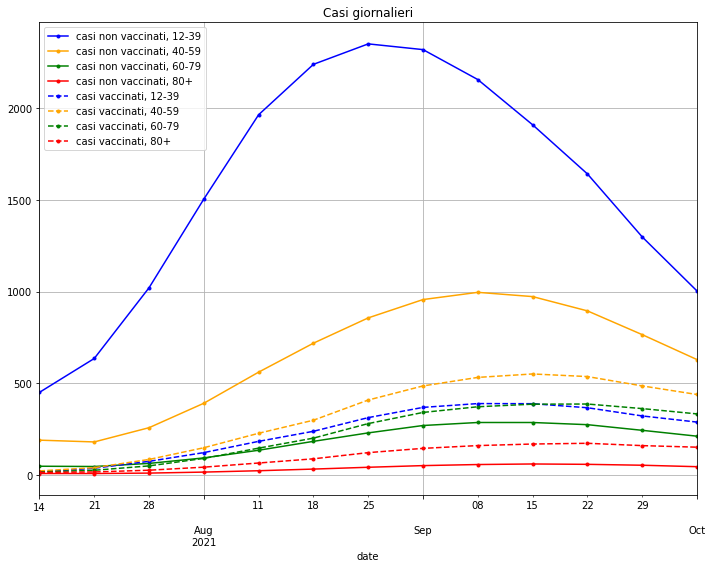

In [129]:
ax = ricava_andamenti_età(files, '12-39', 'casi non vaccinati', incidenza_settimanale = False).plot(figsize=(10, 8), 
                                                                            color='blue', marker='.')
ricava_andamenti_età(files, '40-59', 'casi non vaccinati', incidenza_settimanale = False).plot(ax=ax,
                                                                            color='orange', marker='.')
ricava_andamenti_età(files, '60-79', 'casi non vaccinati', incidenza_settimanale = False).plot(ax=ax,
                                                                            color='green', marker='.')
ricava_andamenti_età(files, '80+', 'casi non vaccinati', incidenza_settimanale = False).plot(ax=ax,
                                                                            color='red', marker='.')
ricava_andamenti_età(files, '12-39', 'casi vaccinati', incidenza_settimanale = False).plot(ax=ax,
                                                                            color='blue', linestyle='--', marker='.')
ricava_andamenti_età(files, '40-59', 'casi vaccinati', incidenza_settimanale = False).plot(ax=ax,
                                                                            color='orange', linestyle='--', marker='.')
ricava_andamenti_età(files, '60-79', 'casi vaccinati', incidenza_settimanale = False).plot(ax=ax,
                                                                            color='green', linestyle='--', marker='.')
ricava_andamenti_età(files, '80+', 'casi vaccinati', incidenza_settimanale = False).plot(ax=ax,
                                                                            color='red', linestyle='--', marker='.')
plt.title('Casi giornalieri')
plt.grid()
plt.tight_layout()
plt.show()

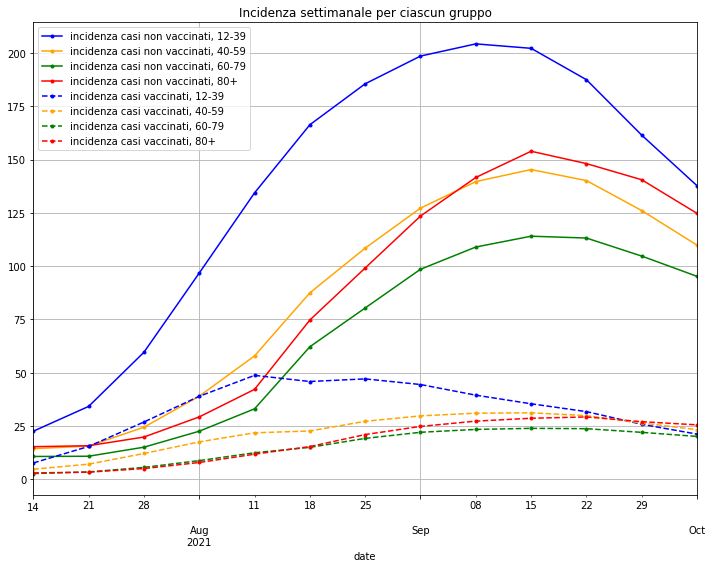

In [130]:
ax = ricava_andamenti_età(files, '12-39', 'casi non vaccinati', incidenza_settimanale = True).plot(figsize=(10, 8), 
                                                                            color='blue', marker='.')
ricava_andamenti_età(files, '40-59', 'casi non vaccinati', incidenza_settimanale = True).plot(ax=ax,
                                                                            color='orange', marker='.')
ricava_andamenti_età(files, '60-79', 'casi non vaccinati', incidenza_settimanale = True).plot(ax=ax,
                                                                            color='green', marker='.')
ricava_andamenti_età(files, '80+', 'casi non vaccinati', incidenza_settimanale = True).plot(ax=ax,
                                                                            color='red', marker='.')
ricava_andamenti_età(files, '12-39', 'casi vaccinati', incidenza_settimanale = True).plot(ax=ax,
                                                                            color='blue', linestyle='--', marker='.')
ricava_andamenti_età(files, '40-59', 'casi vaccinati', incidenza_settimanale = True).plot(ax=ax,
                                                                            color='orange', linestyle='--', marker='.')
ricava_andamenti_età(files, '60-79', 'casi vaccinati', incidenza_settimanale = True).plot(ax=ax,
                                                                            color='green', linestyle='--', marker='.')
ricava_andamenti_età(files, '80+', 'casi vaccinati', incidenza_settimanale = True).plot(ax=ax,
                                                                            color='red', linestyle='--', marker='.')
plt.title('Incidenza settimanale per ciascun gruppo')
plt.grid()
plt.tight_layout()
plt.show()